#Installing all packages

In [ ]:
!pip install mtcnn facenet-pytorch gspread oauth2client opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7

#Extracting Zip File

In [ ]:
import zipfile
import os

zip_path = "/content/Dataset.zip"  # change if your zip has a different name
extract_dir = "/content/faces"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete. Directory structure:")
print(os.listdir(extract_dir))


Extraction complete. Directory structure:
['Dataset ']


#MTCNN Model

In [ ]:
from mtcnn import MTCNN
from PIL import Image
import numpy as np
import os

# Initialize the detector
detector = MTCNN()

# Function to extract and crop face
def extract_face(img_path, required_size=(160, 160)):
    image = Image.open(img_path).convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)
    if results:
        x1, y1, w, h = results[0]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + w, y1 + h
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face).resize(required_size)
        return np.asarray(image)
    else:
        return None

# Adjusted path to the dataset folder
data_dir = "/content/faces/Dataset "

X, y = [], []

for student_id in os.listdir(data_dir):
    student_folder = os.path.join(data_dir, student_id)
    if os.path.isdir(student_folder):
        for filename in os.listdir(student_folder):
            img_path = os.path.join(student_folder, filename)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # only image files
                try:
                    face = extract_face(img_path)
                    if face is not None:
                        X.append(face)
                        y.append(student_id)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

print(f"Dataset created successfully with {len(X)} face images from {len(set(y))} students.")


Dataset created successfully with 283 face images from 7 students.


In [ ]:
np.save("faces_X.npy", X)
np.save("faces_y.npy", y)
print("Saved 'faces_X.npy' and 'faces_y.npy'")

Saved 'faces_X.npy' and 'faces_y.npy'


In [ ]:
from google.colab import files
files.download("faces_X.npy")
files.download("faces_y.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Load the .npy file
arr = np.load('faces_X.npy')

# Print the loaded array
print(arr)

[[[[189 193 158]
   [185 189 154]
   [181 185 150]
   ...
   [133 110 104]
   [130 108 102]
   [121 100  95]]

  [[185 190 156]
   [182 187 153]
   [178 184 150]
   ...
   [143 118 113]
   [138 114 109]
   [125 102  97]]

  [[180 187 154]
   [179 186 153]
   [178 185 151]
   ...
   [140 112 108]
   [150 124 120]
   [148 123 119]]

  ...

  [[196 223 252]
   [195 222 251]
   [193 220 249]
   ...
   [133  91  68]
   [130  88  67]
   [127  86  66]]

  [[195 222 251]
   [195 222 251]
   [191 218 247]
   ...
   [126  84  63]
   [123  82  61]
   [123  82  62]]

  [[192 219 248]
   [194 221 250]
   [185 212 241]
   ...
   [117  76  58]
   [114  76  57]
   [111  74  55]]]


 [[[ 36 175 188]
   [ 38 174 188]
   [ 39 175 189]
   ...
   [ 35  45  46]
   [ 35  44  46]
   [ 33  43  44]]

  [[ 35 175 188]
   [ 37 175 188]
   [ 37 175 188]
   ...
   [ 41  49  51]
   [ 40  48  50]
   [ 38  46  48]]

  [[ 35 175 188]
   [ 37 175 188]
   [ 37 175 188]
   ...
   [ 44  52  54]
   [ 43  51  53]
   [ 43  51

#Face-Net Model

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=a1fe0fcc9fe2977b134786ca503454ebb9d746aaa25313cb9a87ecd6231f83e4
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [ ]:
import numpy as np
from keras_facenet import FaceNet
embedder = FaceNet()


# Make sure X is a numpy array of faces (shape: num_images x 160 x 160 x 3)
X = np.array(X)

# Generate embeddings for all faces
embeddings = embedder.embeddings(X)

print("Face embeddings generated successfully!")
print("Embeddings shape:", embeddings.shape)

9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step
Face embeddings generated successfully!
Embeddings shape: (283, 512)


#Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: First split into train and temp (train + temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    embeddings, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Split the temp set into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Dataset split completed!")
print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Testing samples:", X_test.shape[0])

Dataset split completed!
Training samples: 198
Validation samples: 42
Testing samples: 43


#Training SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM with probability estimates enabled
model = SVC(kernel='linear', probability=True)

# Train the model
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Model trained successfully!")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Model trained successfully!
Validation Accuracy: 100.00%


In [ ]:
import joblib

# Save the trained SVM model
joblib.dump(model, 'face_recognition_model.pkl')
print("SVM Model saved successfully!")

SVM Model saved successfully!


Model Evaluation Completed!
Test Accuracy: 97.67%

Classification Report:
              precision    recall  f1-score   support

   23CAM1001       1.00      1.00      1.00         9
   23CAM1002       0.83      1.00      0.91         5
   23CAM1003       1.00      0.83      0.91         6
   23CAM1004       1.00      1.00      1.00         4
   23CAM1005       1.00      1.00      1.00         4
   23CAM1006       1.00      1.00      1.00         9
   23CAM1007       1.00      1.00      1.00         6

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



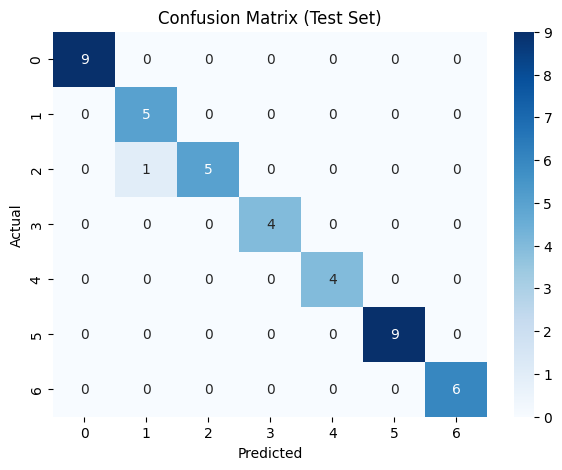

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_test_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Evaluation Completed!")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")

# Detailed report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Optional: confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import os
import pickle

dataset_path = '/content/faces/Dataset '
labels = os.listdir(dataset_path)

label_encoder = LabelEncoder()
label_encoder.fit(labels)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Label encoder regenerated successfully.")


Label encoder regenerated successfully.


#Integrating Models

In [ ]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import datetime
import gspread
from google.oauth2.service_account import Credentials
import os
from google.colab.patches import cv2_imshow

In [ ]:
#Load model and encoder
import joblib
model = joblib.load("face_recognition_model.pkl")

# Recreate label encoder
dataset_path = '/content/faces/Dataset '
labels = os.listdir(dataset_path)
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Initialize FaceNet embedder
embedder = FaceNet()

In [ ]:
creds = Credentials.from_service_account_file(
    '/content/credentials.json',
    scopes=['https://www.googleapis.com/auth/spreadsheets']
)

gc = gspread.authorize(creds)

# Replace with your actual Google Sheet ID
SPREADSHEET_ID = "1c74jySP2ATL5ZUWEDhKecrr6IR4rh7TbPDz4ePALtSY"
sheet = gc.open_by_key(SPREADSHEET_ID).sheet1

In [ ]:
#Attendance function
def mark_attendance(student_id):
    today = datetime.date.today().strftime("%Y-%m-%d")
    now = datetime.datetime.now().strftime("%H:%M:%S")

    # Fetch all existing records
    records = sheet.get_all_records()

    # Avoid duplicate marking
    for record in records:
        if record['Student ID'] == student_id and record['Date'] == today:
            print(f"Attendance already marked for {student_id} today.")
            return

    # Append a new record
    sheet.append_row([student_id, student_id, today, now, "Present"])
    print(f"Attendance marked for {student_id} at {now}")

In [ ]:
from keras_facenet import FaceNet
import numpy as np

embedder = FaceNet()

# Load your saved arrays
X_faces = np.load('faces_X.npy')
y = np.load('faces_y.npy')

# Generate embeddings for all faces
print("Generating embeddings...")
X_embeddings = embedder.embeddings(X_faces)

print(f"Embeddings generated successfully! Shape: {X_embeddings.shape}")
np.save('faces_embeddings.npy', X_embeddings)  # Save for later use


Generating embeddings...
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Embeddings generated successfully! Shape: (283, 512)


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import numpy as np

# Load embeddings and labels
X = np.load('faces_embeddings.npy')
y = np.load('faces_y.npy')

# Encode labels
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Save model and encoder
with open("face_recognition_svm.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("SVM model and label encoder trained and saved successfully!")

SVM model and label encoder trained and saved successfully!


In [ ]:
!ls -lh | grep svm

-rw-r--r-- 1 root root 509K Nov  1 13:12 face_recognition_svm.pkl


#Connecting to Google spread sheets

In [ ]:
import gspread
from google.oauth2.service_account import Credentials

# Google Sheet setup
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = Credentials.from_service_account_file("credentials.json", scopes=scope)
client = gspread.authorize(creds)

spreadsheet_name = "Attendance_Record"

# Try to open or create the sheet safely
try:
    sheet = client.open(spreadsheet_name).sheet1
    print("Existing sheet found and opened!")
except gspread.SpreadsheetNotFound:
    print("Sheet not found — creating a new one...")
    sheet = client.create(spreadsheet_name).sheet1
    sheet.append_row(["Student ID", "Date", "Time", "Status"])
    print("New Google Sheet created and initialized!")

# Verify connection
print(f"Connected to: {spreadsheet_name}")


Existing sheet found and opened!
Connected to: Attendance_Record


In [ ]:
!pip install flask pyngrok qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Connect your ngrok account (paste your token inside quotes)
!ngrok config add-authtoken "34itkIUzqRNUWZdYSm0wTuqwAfd_6dh2BjN3ZEtLJC69L5ppd"

# Create a public URL for the Flask app
public_url = ngrok.connect(5000).public_url
print("Public URL:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: https://parsonlike-merideth-tealess.ngrok-free.dev


In [ ]:
!pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet
print("FaceNet installed successfully!")

FaceNet installed successfully!


In [ ]:
!ls -lh

total 46M
-rw-r--r-- 1 root root 2.4K Nov  1 12:57 credentials.json
-rw-r--r-- 1 root root  23M Nov  1 12:57 Dataset.zip
-rw-r--r-- 1 root root 511K Nov  1 13:10 face_recognition_model.pkl
-rw-r--r-- 1 root root 509K Nov  1 13:12 face_recognition_svm.pkl
drwxr-xr-x 3 root root 4.0K Nov  1 12:58 faces
-rw-r--r-- 1 root root 567K Nov  1 13:12 faces_embeddings.npy
-rw-r--r-- 1 root root  21M Nov  1 13:07 faces_X.npy
-rw-r--r-- 1 root root  11K Nov  1 13:07 faces_y.npy
-rw-r--r-- 1 root root  487 Nov  1 13:12 label_encoder.pkl
drwxr-xr-x 1 root root 4.0K Oct 30 13:36 sample_data


In [ ]:
# Imports
from flask import Flask, request, render_template_string
import qrcode
from pyngrok import ngrok
import cv2
import numpy as np
import pickle
import os
from keras_facenet import FaceNet
from mtcnn import MTCNN
from sklearn.preprocessing import LabelEncoder
from google.oauth2.service_account import Credentials
import gspread
from datetime import datetime
from threading import Thread

#Initialize Flask
app = Flask(__name__)

#Load trained model
print("Loading FaceNet and MTCNN...")
embedder = FaceNet()
detector = MTCNN()

print("Loading trained model (SVM)...")
with open("face_recognition_svm.pkl", "rb") as f:
    model = pickle.load(f)

#Label Encoder (auto from dataset folder)
dataset_path = "/content/faces/Dataset "  # fixed extra space
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

labels = sorted(os.listdir(dataset_path))
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Google Sheets Setup
print("Connecting to Google Sheets...")
scope = [
    "https://www.googleapis.com/auth/spreadsheets",
    "https://www.googleapis.com/auth/drive"
]
creds = Credentials.from_service_account_file("credentials.json", scopes=scope)
client = gspread.authorize(creds)
sheet = client.open("Attendance_Record").sheet1

#Attendance Marking
def mark_attendance(student_id):
    date = datetime.now().strftime("%Y-%m-%d")
    time = datetime.now().strftime("%H:%M:%S")
    sheet.append_row([student_id, date, time, "Present"])
    print(f"Attendance marked for {student_id}")

#HTML Page
UPLOAD_PAGE = """
<!DOCTYPE html>
<html>
  <head>
    <title>Face Attendance</title>
    <style>
      body {
        font-family: Arial;
        text-align: center;
        margin-top: 30px;
        background-color: #f4f4f9;
      }
      video, canvas {
        border: 2px solid #444;
        border-radius: 10px;
        margin: 10px;
      }
      button {
        padding: 10px 20px;
        font-size: 16px;
        background-color: #007bff;
        color: white;
        border: none;
        border-radius: 8px;
        cursor: pointer;
      }
      button:hover {
        background-color: #0056b3;
      }
    </style>
  </head>
  <body>
    <h2>Face Attendance System</h2>
    <p>Allow camera access and click "Capture & Submit"</p>

    <video id="video" width="300" height="250" autoplay></video><br>
    <button id="capture">Capture & Submit</button>
    <canvas id="canvas" width="300" height="250" style="display:none;"></canvas>

    <p id="status"></p>

    <script>
      const video = document.getElementById('video');
      const canvas = document.getElementById('canvas');
      const captureBtn = document.getElementById('capture');
      const statusText = document.getElementById('status');

      // Start camera
      navigator.mediaDevices.getUserMedia({ video: true })
        .then(stream => { video.srcObject = stream; })
        .catch(err => { alert("Camera access denied: " + err); });

      // Capture frame and send to Flask
      captureBtn.addEventListener('click', async () => {
        const context = canvas.getContext('2d');
        context.drawImage(video, 0, 0, canvas.width, canvas.height);

        const dataUrl = canvas.toDataURL('image/jpeg');
        statusText.innerText = "Uploading...";

  const response = await fetch('/upload', {
  method: 'POST',
  headers: { 'Content-Type': 'application/json' },
  body: JSON.stringify({ image: dataUrl })
});

const result = await response.json();
statusText.innerText = result.message || result.error;

      });
    </script>
  </body>
</html>
"""


# Routes
@app.route('/')
def index():
    return render_template_string(UPLOAD_PAGE)

@app.route('/upload', methods=['POST'])
def upload():
    file = request.files['image']
    path = "temp.jpg"
    file.save(path)

    #  Face Recognition
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(rgb)

    if len(faces) == 0:
        return "No face detected. Try again."

    x, y, w, h = faces[0]['box']
    face_img = rgb[y:y+h, x:x+w]
    face_img = cv2.resize(face_img, (160, 160))
    face_img = np.expand_dims(face_img, axis=0)

    # Generate embedding
    embedding = embedder.embeddings(face_img)

    # Get prediction and confidence
    probs = model.predict_proba(embedding)
    confidence = np.max(probs)
    predicted_class = np.argmax(probs)
    name = label_encoder.inverse_transform([predicted_class])[0]

    # Confidence Check
    if confidence < 0.70:
        print(f"Unknown face detected (confidence: {confidence:.2f})")
        return "Student Not Found (Low Confidence)"

    # Mark attendance
    mark_attendance(name)
    print(f"Attendance marked for {name} ({confidence:.2f})")
    return f"Attendance marked successfully for {name}!"


# Flask Server Thread
def run_app():
    app.run(port=7000)

# Ngrok Tunnel
public_url = ngrok.connect(7000)
print(f"Public URL: {public_url}")
print("Flask app is running...")

Thread(target=run_app).start()


Loading FaceNet and MTCNN...
Loading trained model (SVM)...
Connecting to Google Sheets...
Public URL: NgrokTunnel: "https://parsonlike-merideth-tealess.ngrok-free.dev" -> "http://localhost:7000"
Flask app is running...


 Loading FaceNet and MTCNN...
 Loading trained model (SVM)...
 Connecting to Google Sheets...
Public URL: NgrokTunnel: "https://parsonlike-merideth-tealess.ngrok-free.dev" -> "http://localhost:4000"
Flask app is running...


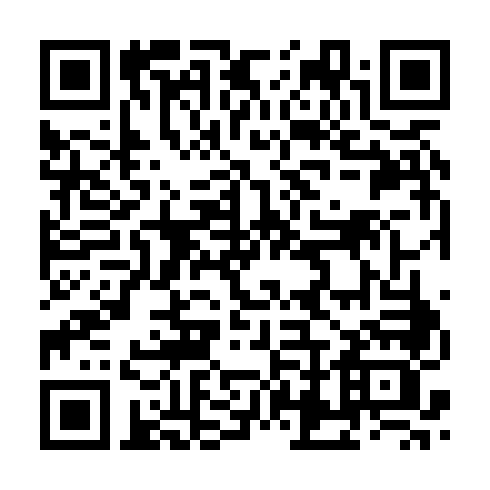

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:4000


In [ ]:
# Imports
from flask import Flask, request, render_template_string, jsonify
from pyngrok import ngrok
import cv2
import numpy as np
import pickle
import os
from keras_facenet import FaceNet
from mtcnn import MTCNN
from sklearn.preprocessing import LabelEncoder
from google.oauth2.service_account import Credentials
import gspread
from datetime import datetime
from threading import Thread
import base64
import re
import qrcode
from IPython.display import Image, display

# Initialize Flask
app = Flask(__name__)

# Load trained model
print(" Loading FaceNet and MTCNN...")
embedder = FaceNet()
detector = MTCNN()

print(" Loading trained model (SVM)...")
with open("face_recognition_svm.pkl", "rb") as f:
    model = pickle.load(f)

# Label Encoder (auto from dataset folder)
dataset_path = "/content/faces/Dataset "
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

labels = sorted(os.listdir(dataset_path))
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Google Sheets Setup
print(" Connecting to Google Sheets...")
scope = [
    "https://www.googleapis.com/auth/spreadsheets",
    "https://www.googleapis.com/auth/drive"
]
creds = Credentials.from_service_account_file("credentials.json", scopes=scope)
client = gspread.authorize(creds)
sheet = client.open("Attendance_Record").sheet1


# Attendance Marking
def mark_attendance(student_id):
    date = datetime.now().strftime("%Y-%m-%d")
    time = datetime.now().strftime("%H:%M:%S")
    sheet.append_row([student_id, date, time, "Present"])
    print(f"Attendance marked for {student_id}")


# HTML (Camera interface)
HTML_PAGE = """
<!DOCTYPE html>
<html>
<head>
  <title>Face Attendance</title>
  <style>
    body { font-family: Arial; text-align: center; background: #f4f4f9; margin-top: 40px; }
    video, canvas { border: 2px solid #555; border-radius: 10px; margin: 10px; }
    button {
      padding: 10px 20px; font-size: 16px; border: none; border-radius: 8px;
      background-color: #007bff; color: white; cursor: pointer;
    }
    button:hover { background-color: #0056b3; }
  </style>
</head>
<body>
  <h2>🎓 Face Attendance System</h2>
  <p>Allow camera access and click "Capture & Submit"</p>

  <video id="video" width="300" height="250" autoplay></video><br>
  <button id="capture">Capture & Submit</button>
  <canvas id="canvas" width="300" height="250" style="display:none;"></canvas>

  <p id="status"></p>

  <script>
    const video = document.getElementById('video');
    const canvas = document.getElementById('canvas');
    const captureBtn = document.getElementById('capture');
    const statusText = document.getElementById('status');

    // Access camera
    navigator.mediaDevices.getUserMedia({ video: true })
      .then(stream => { video.srcObject = stream; })
      .catch(err => { alert("Camera access denied: " + err); });

    // Capture and send
    captureBtn.addEventListener('click', async () => {
      const context = canvas.getContext('2d');
      context.drawImage(video, 0, 0, canvas.width, canvas.height);
      const dataUrl = canvas.toDataURL('image/jpeg');

      statusText.innerText = "Processing...";
      const response = await fetch('/upload', {
        method: 'POST',
        headers: { 'Content-Type': 'application/json' },
        body: JSON.stringify({ image: dataUrl })
      });

      const result = await response.json();
      statusText.innerText = result.message;
    });
  </script>
</body>
</html>
"""

# Flask Routes
@app.route('/')
def index():
    return render_template_string(HTML_PAGE)


@app.route('/upload', methods=['POST'])
def upload():
    data = request.get_json()
    image_data = data.get('image')

    # Decode base64 image
    image_data = re.sub('^data:image/.+;base64,', '', image_data)
    img_bytes = base64.b64decode(image_data)
    np_img = np.frombuffer(img_bytes, np.uint8)
    img = cv2.imdecode(np_img, cv2.IMREAD_COLOR)

    # Detect faces
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(rgb)

    if len(faces) == 0:
        return jsonify({"message": "No face detected. Try again."})
    elif len(faces) > 1:
        return jsonify({"message": "Multiple faces detected! Please show only one face."})

    # Process single detected face
    x, y, w, h = faces[0]['box']
    face_img = rgb[y:y+h, x:x+w]
    face_img = cv2.resize(face_img, (160, 160))
    face_img = np.expand_dims(face_img, axis=0)

    embedding = embedder.embeddings(face_img)
    probs = model.predict_proba(embedding)
    confidence = np.max(probs)
    predicted_class = np.argmax(probs)
    name = label_encoder.inverse_transform([predicted_class])[0]

    # Confidence threshold check
    if confidence < 0.70:
        print(f"Unknown face detected (confidence={confidence:.2f})")
        return jsonify({"message": "Face not matched with any student."})

    # Mark attendance for valid face
    mark_attendance(name)
    print(f"Attendance marked for {name} ({confidence:.2f})")
    return jsonify({"message": f"Attendance marked successfully for {name}!"})


# Run Flask + Ngrok
def run_app():
    app.run(port=4000)

public_url = ngrok.connect(4000)
print(f"Public URL: {public_url}")
print("Flask app is running...")

# Generate and display QR code
qr = qrcode.make(str(public_url))
qr.save("attendance_qr.png")
display(Image(filename="attendance_qr.png"))

Thread(target=run_app).start()
